In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
heart = pd.read_csv('data/heart.csv')
df = heart

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [79]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [80]:
# Check for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [81]:
# Check for duplicates
df.duplicated().sum()

0

# Data Visualization and preprocessing

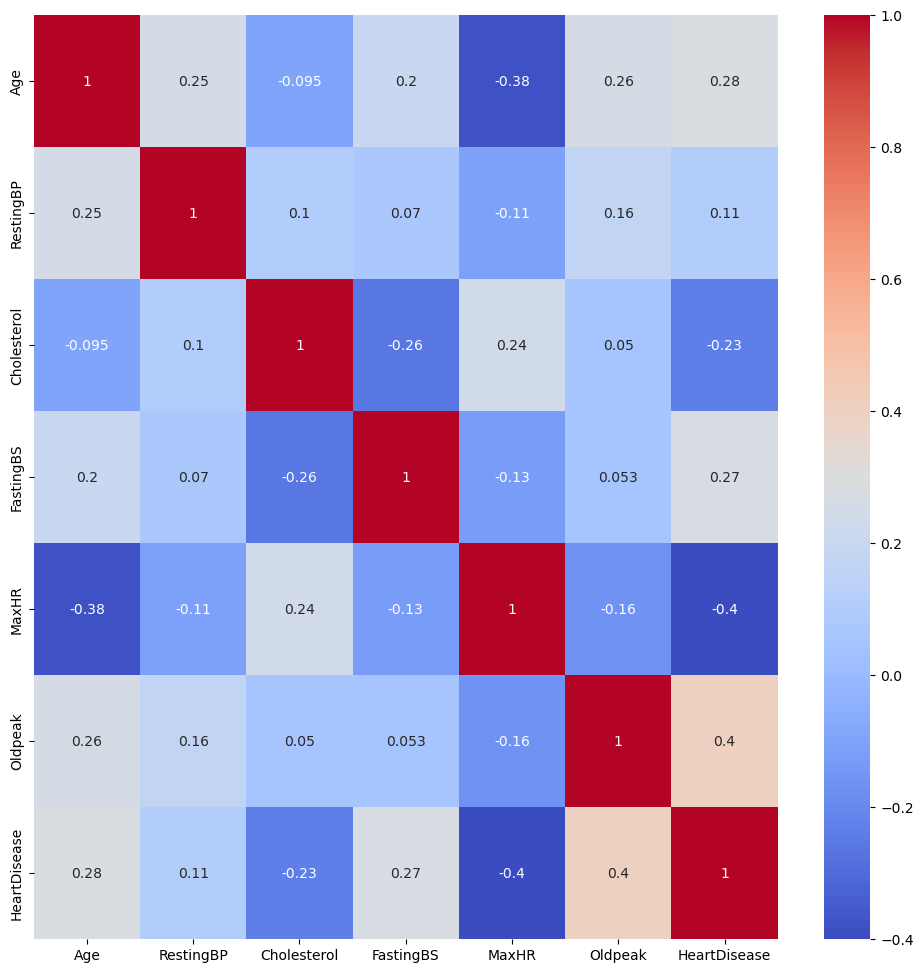

In [82]:
# Correlation matrix, put heart disease as the last column
corr = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [5]:
# Transform categorical data to numerical data
# use one-hot encoding

cat_var_names = df.select_dtypes(include=['object']).columns

# display number of unique values for each categorical variable
for var in cat_var_names:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Sex  contains  2  labels
ChestPainType  contains  4  labels
RestingECG  contains  3  labels
ExerciseAngina  contains  2  labels
ST_Slope  contains  3  labels


In [6]:
# do one-hot encoding on all categorical variables
df = pd.get_dummies(df, drop_first=True)

In [7]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


## Visualization

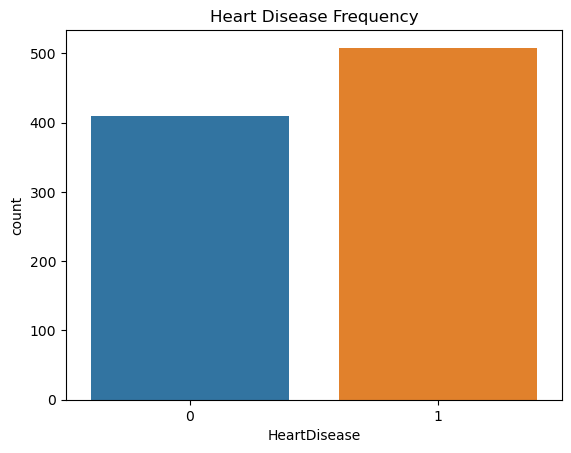

In [8]:
# show number of people with heart disease and without heart disease
sns.countplot(x='HeartDisease', data=df).set_title('Heart Disease Frequency')
plt.show()

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,0.188453,0.221133,0.050109,0.601307,0.193900,0.404139,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.391287,0.415236,0.218289,0.489896,0.395567,0.490992,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


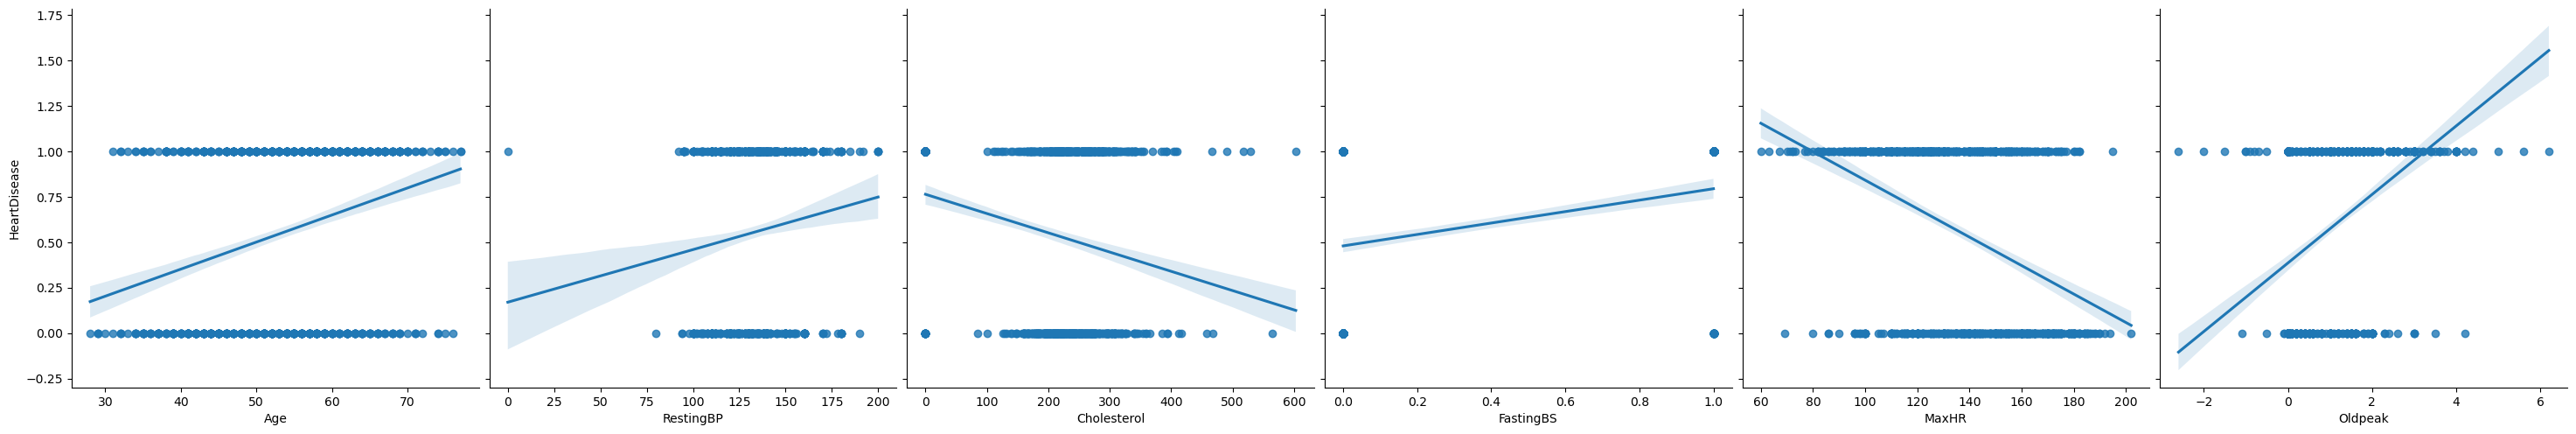

In [10]:
continuous_features = ['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak']
sns.pairplot(heart, x_vars=continuous_features, y_vars='HeartDisease', kind = 'reg', height = 5)

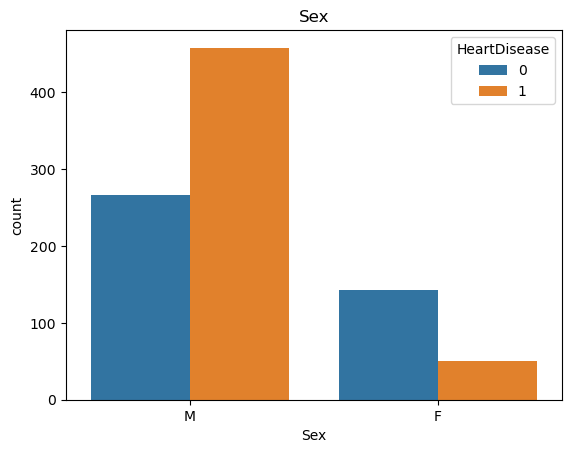

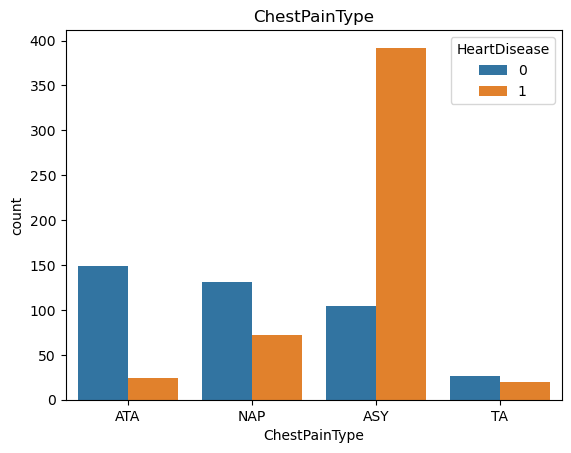

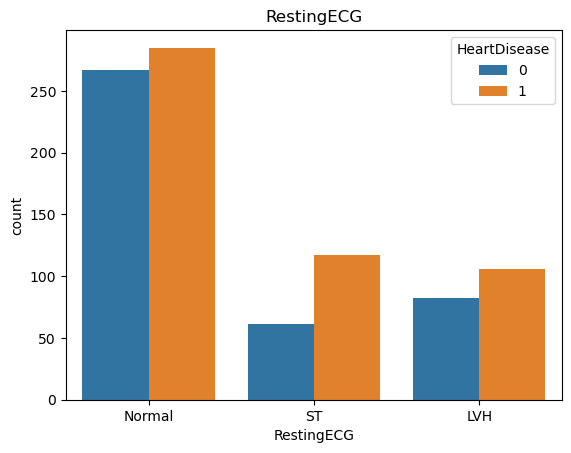

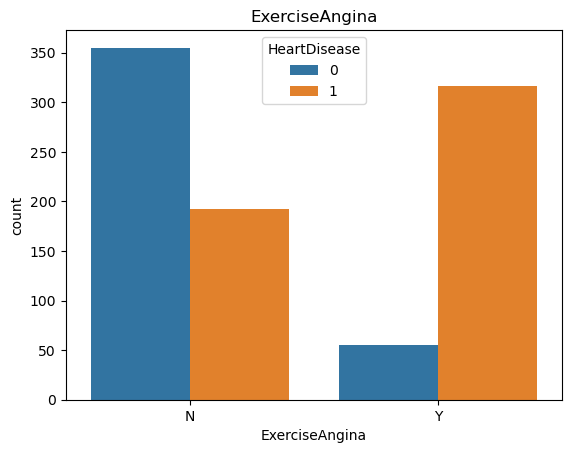

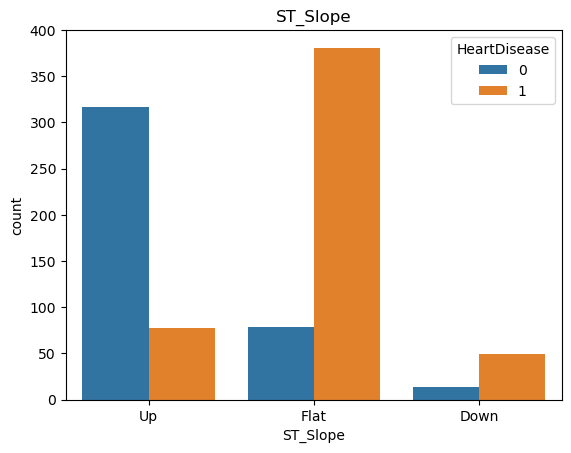

In [11]:
categorical_features = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for feature in categorical_features:
    #sns.countplot(x=', y='HeartDisease', data=heart, kind='bar', height=5)
    sns.countplot(data = heart, x=feature,hue='HeartDisease').set(title=feature)
    plt.show()

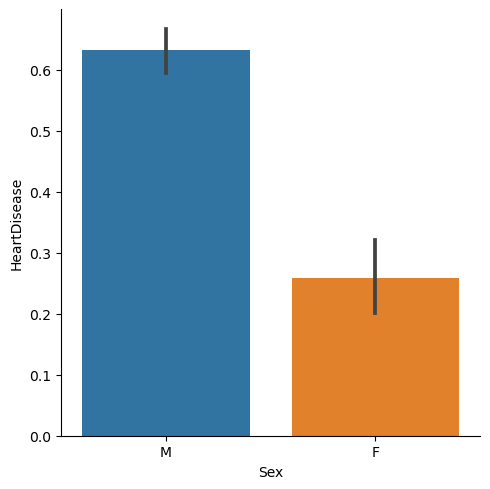

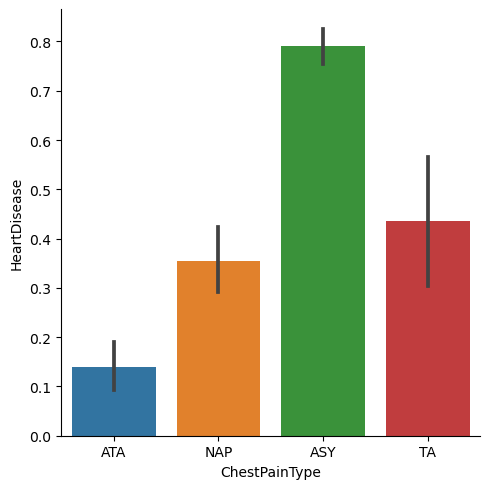

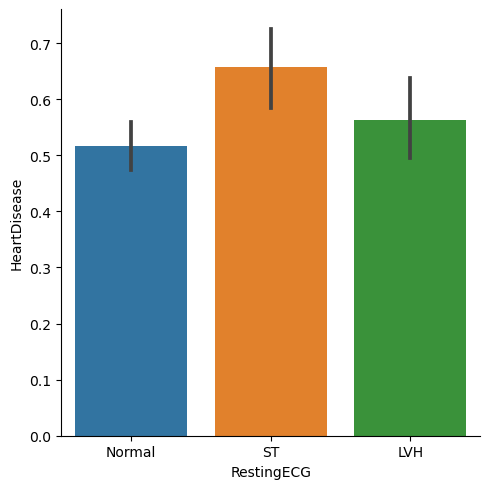

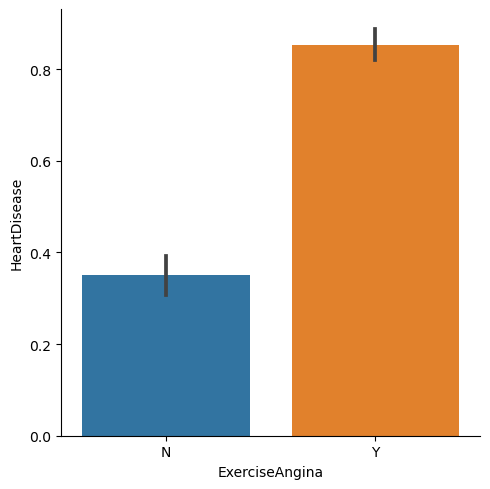

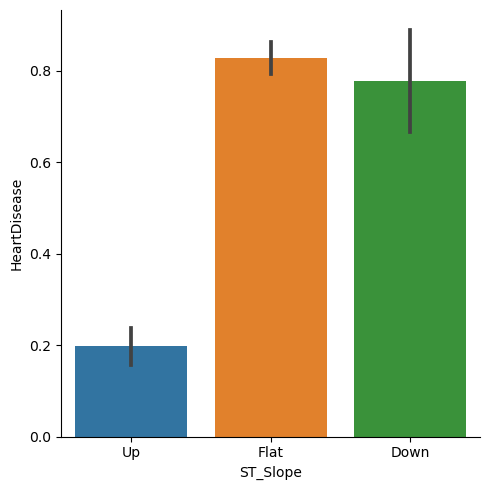

In [12]:
for feature in categorical_features:
    sns.catplot(x=feature, y='HeartDisease', data=heart, kind='bar', height=5)
    plt.show()


In [13]:
# TODO:
# Linear Regression
# Linear SVM
# Non-linear SVM
# Random Forest
# Boosting

## Outliers detection through PCA

In [14]:
#!pip install pca
from pca import pca

data = df
data = data.set_index('HeartDisease')

In [93]:
outliers_detection = pca(normalize=True, detect_outliers=['ht2','spe'],n_std=3)

outliers = outliers_detection.fit_transform(data)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [15] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [13] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[13]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [94]:
# data.loc[outliers['outliers']['y_bool'],:]
# df.loc[outliers['outliers']['y_bool'],:]
# np.where(outliers['outliers']['y_bool']==True)
# print(outliers['outliers'])

[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2000x1200 with 1 Axes>,
 <AxesSubplot:title={'center':'Outliers marked using SPE/dmodX and Hotellings T2 methods'}, xlabel='PC1 (22.5% expl.var)', ylabel='PC2 (11.0% expl.var)'>)

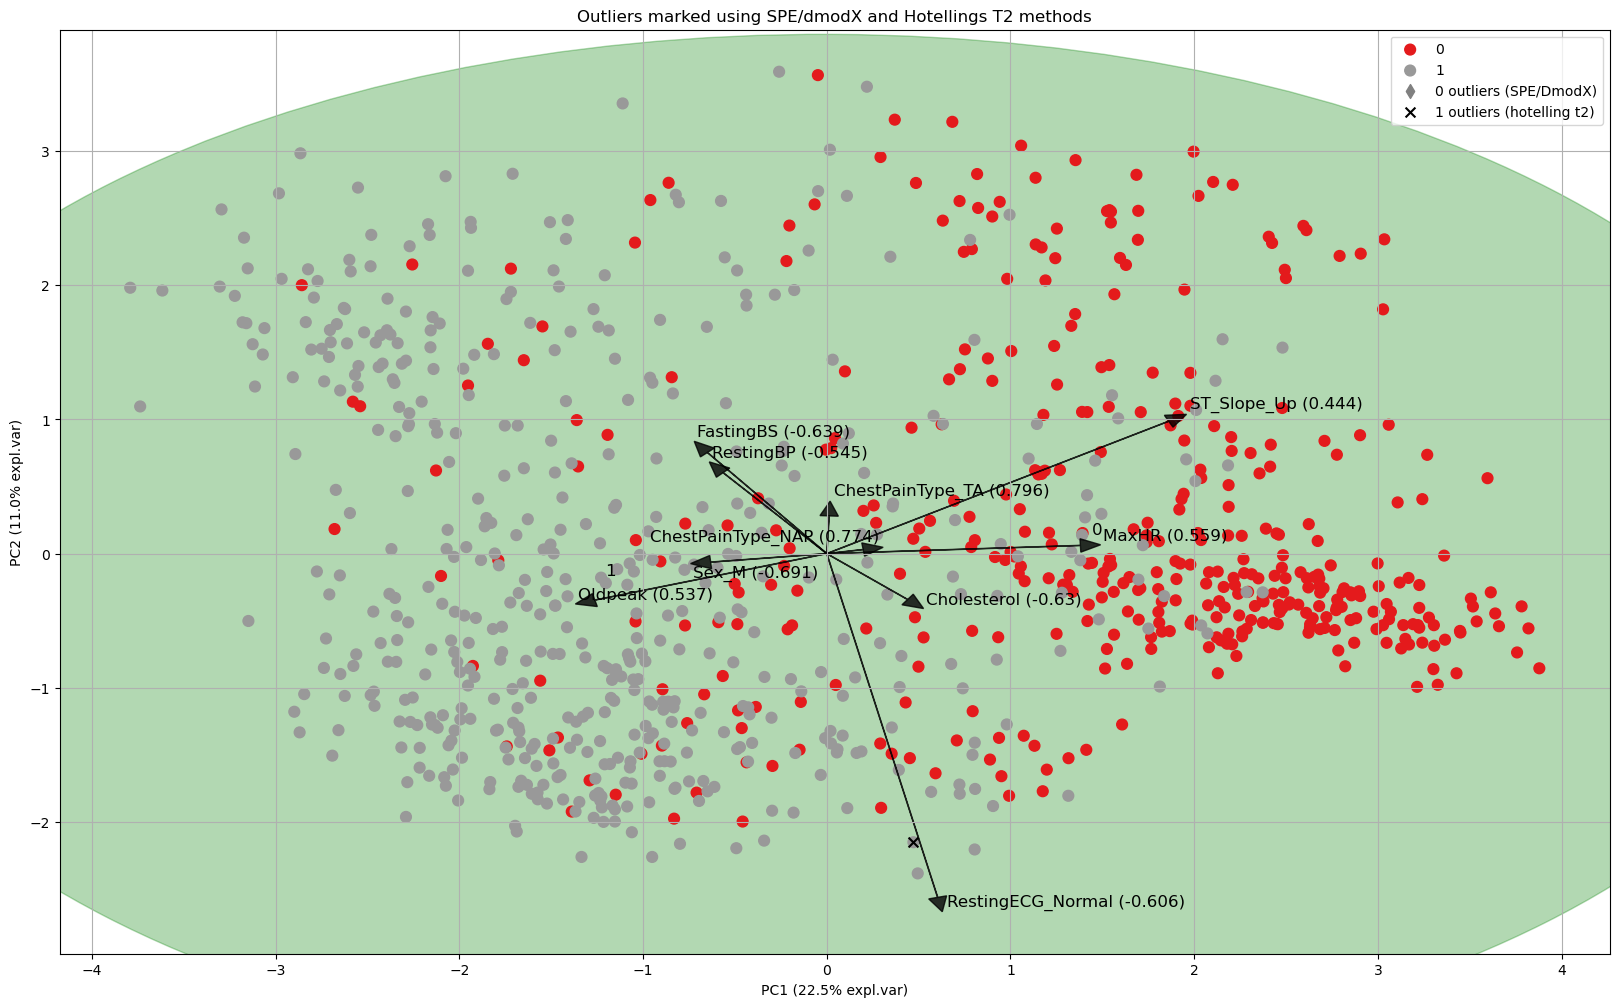

In [95]:
outliers_detection.biplot(SPE=True,hotellingt2=True,title='Outliers marked using SPE/dmodX and Hotellings T2 methods', label = True,
                          jitter = 0.1, n_feat = 10, legend = True, y = data.index, figsize=(20,12),color_arrow = 'k')
                        #   cmap = 'bwr_r')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 2000x1200 with 2 Axes>,
 <Axes3D:title={'center':'Outliers marked using SPE/dmodX and Hotellings T2 methods'}, xlabel='PC1 (22.5% expl.var)', ylabel='PC2 (11.0% expl.var)'>)

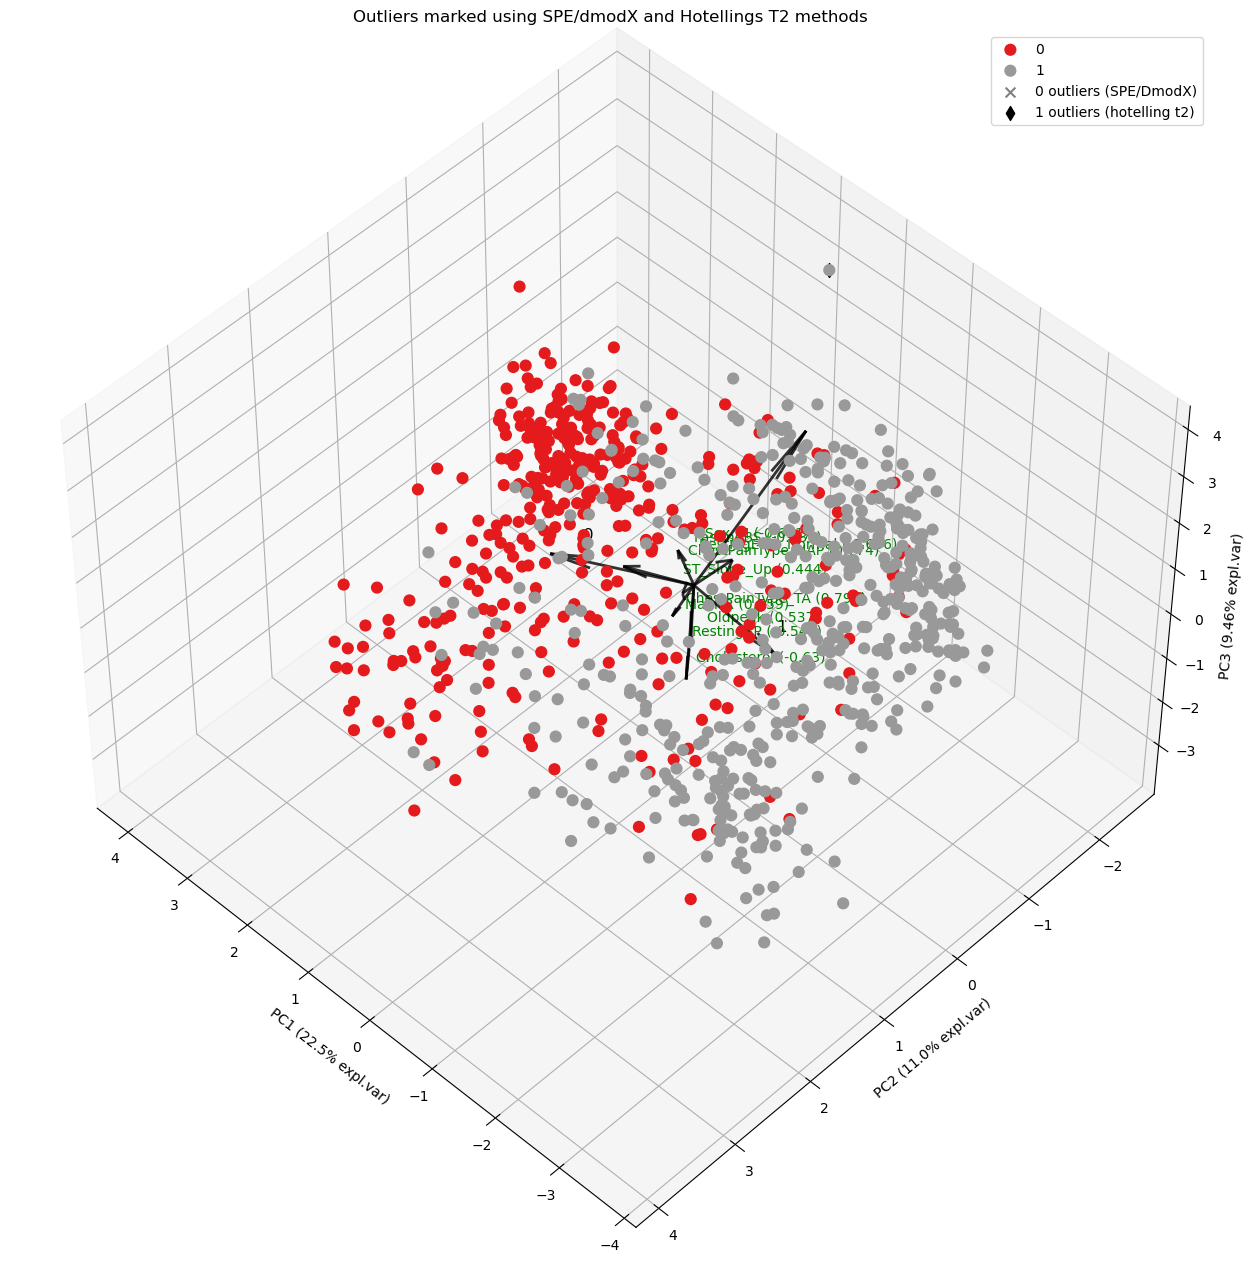

In [96]:
outliers_detection.biplot3d(SPE=True,hotellingt2=True,title='Outliers marked using SPE/dmodX and Hotellings T2 methods', label = True,
                          jitter = 0.1, n_feat = 10, legend = True, y = data.index, figsize=(20,12),color_arrow = 'k')

## Feature engineering

In [14]:
df = heart
df = df.loc[df.index!=449,:]
X = df.loc[:, df.columns != 'HeartDisease']
y = df[['HeartDisease']]

In [15]:
def apply_poly_basis_df(df, deg=2):
    df_ = df.copy()
    for n in range(deg + 1):
        if n >= 2:
            df_[df.columns + f"^{n}"] = df ** n
    return df_

In [16]:
X[categorical_features]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [17]:
X = pd.get_dummies(apply_poly_basis_df(X[continuous_features], deg=3).join(X[categorical_features]), drop_first=True)
X.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Age^2', 'RestingBP^2', 'Cholesterol^2', 'FastingBS^2', 'MaxHR^2',
       'Oldpeak^2', 'Age^3', 'RestingBP^3', 'Cholesterol^3', 'FastingBS^3',
       'MaxHR^3', 'Oldpeak^3', 'Sex_M', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                917 non-null    int64  
 1   RestingBP          917 non-null    int64  
 2   Cholesterol        917 non-null    int64  
 3   FastingBS          917 non-null    int64  
 4   MaxHR              917 non-null    int64  
 5   Oldpeak            917 non-null    float64
 6   Age^2              917 non-null    int64  
 7   RestingBP^2        917 non-null    int64  
 8   Cholesterol^2      917 non-null    int64  
 9   FastingBS^2        917 non-null    int64  
 10  MaxHR^2            917 non-null    int64  
 11  Oldpeak^2          917 non-null    float64
 12  Age^3              917 non-null    int64  
 13  RestingBP^3        917 non-null    int64  
 14  Cholesterol^3      917 non-null    int64  
 15  FastingBS^3        917 non-null    int64  
 16  MaxHR^3            917 non

## SMOTE

In [102]:
# ## SMOTE
# # !pip install imblearn
# from imblearn.over_sampling import SMOTE

# # create synthetic samples
# smote = SMOTE()
# x_train_smote, y_train_smote = smote.fit_resample(x_train_values, y_train_values)


# # # create dataframe with the number of samples per class
# # df = pd.DataFrame({'Class': ['Survived', 'Died'], 'Number of samples': ys.value_counts().values})

# # # plot the dataframe
# # df.plot.bar(x='Class', y='Number of samples', rot=0)

# # # create barplot with old distribution of the target variable
# # plt.figure(figsize=(5, 5))

# # # create dataframe with the number of samples per class after smote
# # df = pd.DataFrame({'Class': ['Survived', 'Died'], 'Number of samples': pd.Series(y_train_smote).value_counts().values})

# # # plot the dataframe
# # df.plot.bar(x='Class', y='Number of samples', rot=0)

# # print(x_train_smote.shape, y_train_smote.shape)
# # print(x_train_values.shape, y_train_values.shape)

NameError: name 'x_train_values' is not defined

# Create Test and Train Data

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [20]:
X_train.shape, X_test.shape

((733, 27), (184, 27))

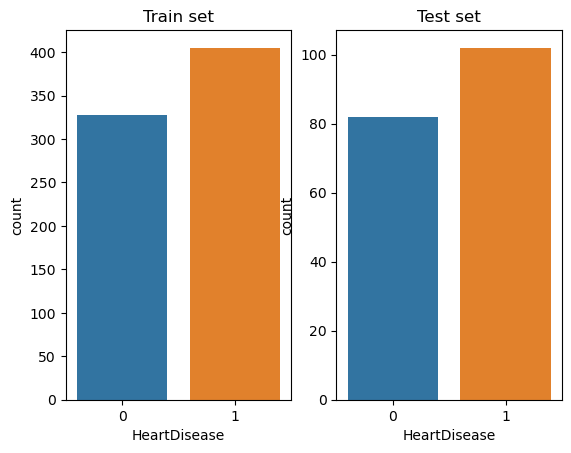

In [21]:
f, axes = plt.subplots(1, 2)
sns.countplot(x='HeartDisease', data=y_train, ax = axes[0]).set(title='Train set')
sns.countplot(x='HeartDisease', data=y_test, ax = axes[1]).set(title='Test set')
plt.show()

## Transformation and model training

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, f1_score, confusion_matrix, balanced_accuracy_score, roc_auc_score, roc_curve, auc

In [23]:
# Set up the pipeline

scaler = MinMaxScaler()
pca = decomposition.PCA()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(733, 27)
(733, 1)
(184, 27)
(184, 1)


LOGISTIC REGRESSION

In [45]:
### Logistic Regression Pipeline
from sklearn.linear_model import LogisticRegression

logistic_Reg = LogisticRegression(max_iter=10000,tol=0.0001)

pipe = Pipeline(steps=[('scaler',scaler), 
                    #    ('pca', pca), 
                       ('logistic_Reg', logistic_Reg)])

### Logistic Regression Grid Search

n_components = [3, 4, 5, 6, 7, 8]
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

# SCORINGS = "f1_weighted"
SCORINGS = "f1"

parameters = dict(logistic_Reg__C=C,
                  logistic_Reg__penalty=penalty)

### Logistic Regression hyperparameter tuning by CV

clf_LogReg = GridSearchCV(pipe, parameters, n_jobs=2, scoring=SCORINGS, verbose=0, cv=5)


In [110]:
clf_LogReg.fit(X_train, y_train)

/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('logistic_Reg',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=2,
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l1', 'l2']},
             scoring='f1')

In [111]:
# cv_results_df = pd.DataFrame(clf_LogReg.cv_results_)
# with pd.option_context("display.float_format", "{:.2g}".format):
#     display(cv_results_df)

In [112]:
print('Best Penalty:', clf_LogReg.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_LogReg.best_estimator_.get_params()['logistic_Reg__C'])
print(); print(clf_LogReg.best_estimator_.get_params()['logistic_Reg'])
print("f1-score :",clf_LogReg.best_score_)


Best Penalty: l2
Best C: 0.2682695795279725

LogisticRegression(C=0.2682695795279725, max_iter=10000)
f1-score : 0.8799633594676592


In [138]:
# Logistic Regression with optimized hyperparameters

# Fit
clf_LogReg.best_estimator_.fit(X_train, y_train)

# Predict
#y_pred1 = clf_LogReg.best_estimator_.predict(X_train)
y_pred = clf_LogReg.best_estimator_.predict(X_test)

# Evaluate
#print('Accuracy score: %.2f' % accuracy_score(y_train, y_pred1))
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('Balanced Accuracy score: %.2f' % balanced_accuracy_score(y_test, y_pred))
print('ROC AUC score: %.2f' % roc_auc_score(y_test, y_pred))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 0.86
Balanced Accuracy score: 0.86
ROC AUC score: 0.86
F1 Score: 0.87


In [46]:
# Logistic Regression
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression(max_iter=10000,tol=0.1)

lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate

print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('Balanced Accuracy score: %.2f' % balanced_accuracy_score(y_test, y_pred))
print('ROC AUC score: %.2f' % roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

Accuracy score: 0.85
Balanced Accuracy score: 0.85
ROC AUC score: 0.95
F1 Score: 0.86


/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
# lr.get_params()

LINEAR SVM

In [132]:
# import balanced_accuracy_score
from sklearn.metrics import balanced_accuracy_score
#import ROC AUC
from sklearn.metrics import roc_auc_score

In [43]:
# Linear SVM
from sklearn.svm import LinearSVC

lsvm = LinearSVC(max_iter=10000, penalty="l2", loss="hinge", dual=True)
lsvm.fit(X_train, y_train)

# Predict
y_pred = lsvm.predict(X_test)

# Evaluate
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('Balanced Accuracy score: %.2f' % balanced_accuracy_score(y_test, y_pred))
print('ROC AUC score: %.2f' % roc_auc_score(y_test, lsvm.decision_function(X_test)))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

Accuracy score: 0.88
Balanced Accuracy score: 0.88
ROC AUC score: 0.95
F1 Score: 0.89


/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
lsvm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'hinge',
 'max_iter': 10000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

linear SVM with loss hinge performs 1% better than with loss squared_hinge.
There are no other parameters to test, so I did not create a GridSearchCV here.

In [120]:
# Non-linear SVM
from sklearn.svm import NuSVC
nsvm = NuSVC()
nsvm_pipe = Pipeline(steps=[('scaler',scaler), 
                       ('nsvm', nsvm)])
param_grid_svc = {'nsvm__nu': [0.1, 1, 10, 100, 1000], 
              'nsvm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'nsvm__kernel': ['rbf','linear', 'poly','sigmoid']} 
SCORINGS = "f1"
clf_nlsvm = GridSearchCV(nsvm_pipe, param_grid_svc, n_jobs=2, scoring=SCORINGS, verbose=1, cv=5)

In [121]:
clf_nlsvm.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('nsvm', NuSVC())]),
             n_jobs=2,
             param_grid={'nsvm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'nsvm__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                         'nsvm__nu': [0.1, 1, 10, 100, 1000]},
             scoring='f1', verbose=1)

In [122]:
print('Best gamma:', clf_nlsvm.best_estimator_.get_params()['nsvm__gamma'])
print('Best nu:', clf_nlsvm.best_estimator_.get_params()['nsvm__nu'])
print('Best kernel:',clf_nlsvm.best_estimator_.get_params()['nsvm__kernel'])
print("f1-score :",clf_nlsvm.best_score_)

Best gamma: 1
Best nu: 0.1
Best kernel: rbf
f1-score : 0.831305265054648


In [123]:
# SVM with optimized hyperparameters

# Fit
clf_nlsvm.best_estimator_.fit(X_train, y_train)

# Predict
y_pred = clf_nlsvm.best_estimator_.predict(X_test)

# Evaluate
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

Accuracy score: 0.82
F1 Score: 0.83


/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
# Non-linear SVM
from sklearn.svm import NuSVC
# kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
nsvm = NuSVC()
nsvm.fit(X_train, y_train)

# Predict
y_pred = nsvm.predict(X_test)

# Evaluate
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('Balanced Accuracy score: %.2f' % balanced_accuracy_score(y_test, y_pred))
print('ROC AUC score: %.2f' % roc_auc_score(y_test, nsvm.decision_function(X_test)))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

Accuracy score: 0.86
Balanced Accuracy score: 0.86
ROC AUC score: 0.94
F1 Score: 0.88


/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


linear kernel performs 1% better than with rbf kernel. This means that basically a linear SVC is used.
No other parameters to test, so I did not create a GridSearchCV here.

In [41]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=0, criterion='gini')
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('Balanced Accuracy score: %.2f' % balanced_accuracy_score(y_test, y_pred))
print('ROC AUC score: %.2f' % roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

/var/folders/0m/07y4vn414bng8jcy4nv9qj900000gp/T/ipykernel_39147/2672505897.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy score: 0.89
Balanced Accuracy score: 0.89
ROC AUC score: 0.93
F1 Score: 0.90


In [62]:
print(recall_score(y_test, rf.predict(X_test)))
print(precision_score(y_test, rf.predict(X_test)))


0.9117647058823529
0.8942307692307693


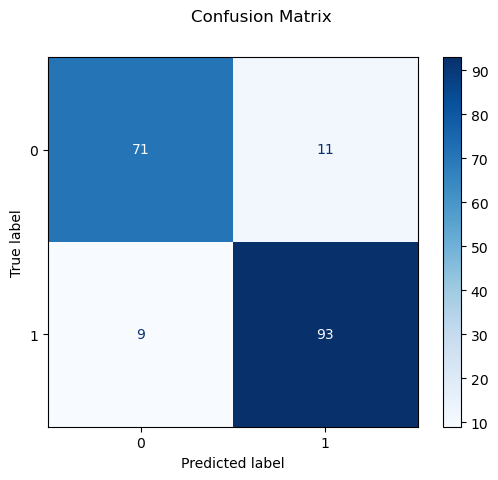

In [37]:
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_estimator(
    rf, X_test, y_test, cmap=plt.cm.Blues
)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


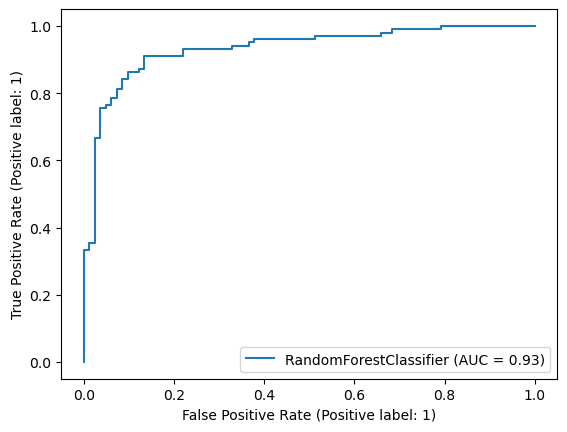

In [38]:
#Plot ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf, X_test, y_test)
plt.show()

In [129]:
# create a grid search for random forest
# create parameter grid
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2,4, 6, 8],
    'random_state': [0],
    'criterion': ['gini', 'entropy'],
}

# create grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# fit the grid search
grid_search.fit(X_train, np.ravel(y_train))

# display the best parameters
grid_search.best_params_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 200, 'random_state': 0}

In [127]:
# get the best model
best_model = grid_search.best_estimator_

# predict the test set
y_pred = best_model.predict(X_test)

# evaluate the model
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))


Accuracy score: 0.86
F1 Score: 0.88


In [230]:
grid_search.best_score_

0.8636380579629112

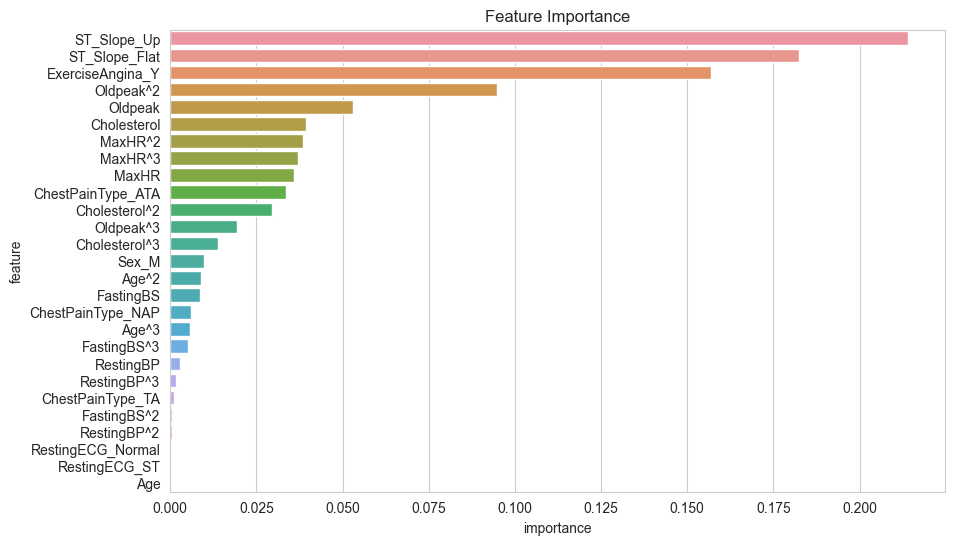

In [179]:
# get variable importance from random forest
importance = rf.feature_importances_

# get names of the features
names = X.columns

# create a dataframe with the features and their importance
feature_importance = pd.DataFrame({'feature': names, 'importance': importance})

# sort the dataframe by importance
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)

# plot the dataframe
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.show()

In [47]:
# Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)

# Predict
y_pred = gb.predict(X_test)

# Evaluate
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('Balanced Accuracy score: %.2f' % balanced_accuracy_score(y_test, y_pred))
print('ROC AUC score: %.2f' % roc_auc_score(y_test, gb.predict_proba(X_test)[:,1]))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 0.86
Balanced Accuracy score: 0.86
ROC AUC score: 0.93
F1 Score: 0.88


In [181]:
print('test')

test


In [49]:

#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [50]:
# Decision tree prediction
y_pred = dt.predict(X_test)
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('Balanced Accuracy score: %.2f' % balanced_accuracy_score(y_test, y_pred))
print('ROC AUC score: %.2f' % roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

Accuracy score: 0.77
Balanced Accuracy score: 0.77
ROC AUC score: 0.77
F1 Score: 0.79


In [144]:
import catboost as cb
from catboost import CatBoostClassifier, Pool, cv

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier()

# Fit model
catboost_model.fit(X_train, y_train)

Learning rate set to 0.009023
0:	learn: 0.6866202	total: 8.91ms	remaining: 8.9s
1:	learn: 0.6791808	total: 12.9ms	remaining: 6.43s
2:	learn: 0.6727834	total: 16.4ms	remaining: 5.45s
3:	learn: 0.6656119	total: 25.3ms	remaining: 6.3s
4:	learn: 0.6598800	total: 30.5ms	remaining: 6.07s
5:	learn: 0.6531472	total: 51.5ms	remaining: 8.53s
6:	learn: 0.6465172	total: 57ms	remaining: 8.09s
7:	learn: 0.6408045	total: 62.7ms	remaining: 7.77s
8:	learn: 0.6344169	total: 66.7ms	remaining: 7.34s
9:	learn: 0.6293013	total: 69.4ms	remaining: 6.87s
10:	learn: 0.6229242	total: 73.3ms	remaining: 6.59s
11:	learn: 0.6178596	total: 77.4ms	remaining: 6.37s
12:	learn: 0.6128235	total: 81.6ms	remaining: 6.2s
13:	learn: 0.6077214	total: 85.7ms	remaining: 6.04s
14:	learn: 0.6022360	total: 88.5ms	remaining: 5.81s
15:	learn: 0.5961250	total: 92.3ms	remaining: 5.68s
16:	learn: 0.5924293	total: 94.9ms	remaining: 5.49s
17:	learn: 0.5875262	total: 101ms	remaining: 5.5s
18:	learn: 0.5843453	total: 103ms	remaining: 5.3s
1

In [145]:
y_pred = catboost_model.predict(X_test)
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('Balanced Accuracy score: %.2f' % balanced_accuracy_score(y_test, y_pred))
print('ROC AUC score: %.2f' % roc_auc_score(y_test, y_pred))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

Accuracy score: 0.86
Balanced Accuracy score: 0.86
ROC AUC score: 0.86
F1 Score: 0.87


In [25]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
#Initialize the classifier
lgbm = LGBMClassifier()
#Fit the data
lgbm.fit(X_train, y_train)

/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier()

: 

To do (H):
- SmoteNC for different approach (without One-Hot !!!)

## LAZY PREDICT

In [182]:
# !pip install lazypredict
from lazypredict.Supervised import LazyClassifier

ModuleNotFoundError: No module named 'lazypredict'

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

## XGB

In [53]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
#Initialize the classifier
xgb = XGBClassifier()
xgb_param_grid = {
    'n_estimators': range(1,20),
    'max_depth': range(1, 10),
    'learning_rate': [.1,.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1],
    'booster':["gbtree"],
    'min_child_weight': [0.001,0.003,0.01]}

xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

In [54]:
#Fit the data
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                     

In [56]:
xgb_bp = xgb_random.best_params_
xgb_model=XGBClassifier(n_estimators=xgb_bp["n_estimators"],
                            min_child_weight=xgb_bp["min_child_weight"],
                            max_depth=xgb_bp["max_depth"],
                            learning_rate=xgb_bp["learning_rate"],
                            colsample_bytree=xgb_bp["colsample_bytree"],
                            booster=xgb_bp["booster"])
#Fit the data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.55, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=0.001, missing=nan, monotone_constraints=None,
              n_estimators=11, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
y_pred = xgb_model.predict(X_test)
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('Balanced Accuracy score: %.2f' % balanced_accuracy_score(y_test, y_pred))
print('ROC AUC score: %.2f' % roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

Accuracy score: 0.86
Balanced Accuracy score: 0.87
ROC AUC score: 0.95
F1 Score: 0.87


In [58]:
accuracy_score(y_train, xgb_model.predict(X_train))

0.9495225102319236

In [59]:
accuracy_score(y_train, rf.predict(X_train))

0.8553888130968622

Overfitting !!!